### Finding a better model for home prices

**Random Forest Regression**

Pretty good results after selecting specific columns and using log transformations on variables with skewed distributions.

**Philly**

- r2 = 0.51
- most important features = Asian %, income, bach. degree %

**Pittsburgh**

- r2 = 0.38
- most important features = bach. degree %, Black %, white %

**Detroit**

- r-squared = 0.46
- most important features = total businesses, misc. crime rate, unemployed %

**Combined**

- r-squared = 0.33
- most important features = crime rates, income, race

### Set-up

In [2]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
#import philadelphia data
philly_df = pd.read_csv('Resources/Final Compiled Data/merged_philadelphia_acs_commerce_crime_sales.csv')

#import pittsburgh data
pitt_df = pd.read_csv('Resources/Final Compiled Data/merged_pittsburgh_acs_commerce_crime_sales.csv')

#import detroit data
det_df = pd.read_csv('Resources/Final Compiled Data/merged_detroit_acs_commerce_crime_sales.csv')

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/2716167202.py:8: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  det_df = pd.read_csv('Resources/Final Compiled Data/merged_detroit_acs_commerce_crime_sales.csv')


In [5]:
#drop duplicate GEOIDs
philly_df.drop_duplicates(subset=['GEOID'], inplace=True)
pitt_df.drop_duplicates(subset=['GEOID'], inplace=True)
det_df.drop_duplicates(subset=['GEOID'], inplace=True)

In [13]:
selected_columns_phl = philly_df[['Households!!Estimate!!Median income (dollars)',
       "Total!!Estimate!!Bachelor's degree or higher", 'Estimate!!Total',
      'White_pct', 'Black_pct', 'Asian_pct', 'Other_pct',
       'Unemployment rate!!Estimate!!Population 16 years and over',
       'total_businesses', 'nuisance_crime', 'other_crime', 'property_crime',
       'violent_crime', 'total_offenses', 'city', 'address', 'zipcode', 'sale_price']]

selected_columns_det = det_df[['Households!!Estimate!!Median income (dollars)',
       "Total!!Estimate!!Bachelor's degree or higher", 'Estimate!!Total',
      'White_pct', 'Black_pct', 'Asian_pct', 'Other_pct',
       'Unemployment rate!!Estimate!!Population 16 years and over',
       'total_businesses', 'nuisance_crime', 'other_crime', 'property_crime',
       'violent_crime', 'total_offenses', 'city', 'address', 'zipcode', 'sale_price']]

selected_columns_pitt = pitt_df[['Households!!Estimate!!Median income (dollars)',
       "Total!!Estimate!!Bachelor's degree or higher", 'Estimate!!Total',
      'White_pct', 'Black_pct', 'Asian_pct', 'Other_pct',
       'Unemployment rate!!Estimate!!Population 16 years and over',
       'total_businesses', 'nuisance_crime', 'other_crime', 'property_crime',
       'violent_crime', 'total_offenses', 'city', 'address', 'zipcode', 'sale_price']]

selected_columns_det.rename({
    'Households!!Estimate!!Median income (dollars)': 'median_income',
    "Total!!Estimate!!Bachelor's degree or higher": 'bach_attainment',
    'Estimate!!Total': 'total_pop',
    'Unemployment rate!!Estimate!!Population 16 years and over': 'unemploy_pct'
}, axis=1, inplace=True)

selected_columns_phl.rename({
    'Households!!Estimate!!Median income (dollars)': 'median_income',
    "Total!!Estimate!!Bachelor's degree or higher": 'bach_attainment',
    'Estimate!!Total': 'total_pop',
    'Unemployment rate!!Estimate!!Population 16 years and over': 'unemploy_pct'
}, axis=1, inplace=True)

selected_columns_pitt.rename({
    'Households!!Estimate!!Median income (dollars)': 'median_income',
    "Total!!Estimate!!Bachelor's degree or higher": 'bach_attainment',
    'Estimate!!Total': 'total_pop',
    'Unemployment rate!!Estimate!!Population 16 years and over': 'unemploy_pct'
}, axis=1, inplace=True)

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/3841371833.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_det.rename({
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/3841371833.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_phl.rename({
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/3841371833.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

### Checking out Philly data

In [ ]:
#sale price distribution
price_dist = philly_df[['Census Tract', 'sale_price']].groupby('Census Tract').median()

fig = px.histogram(price_dist, x="sale_price")
fig.show()

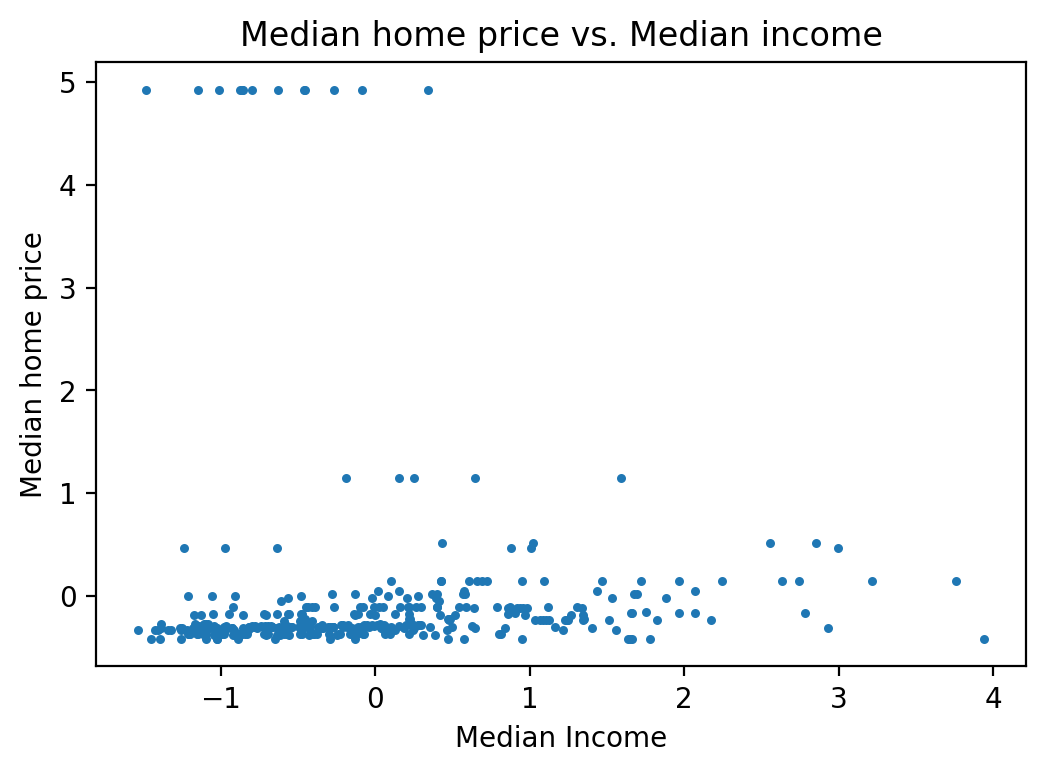

In [46]:
#scatter matrix (selected columns)

# selected = philly_df[['sale_price', 'Households!!Estimate!!Median income (dollars)', 
#                       "Total!!Estimate!!Bachelor's degree or higher",
#                      'Black_pct', 'Asian_pct', 'Employed!!Estimate!!Population 16 years and over',
#                      'total_offenses' ]]
# fig = px.scatter(x=philly_df['Households!!Estimate!!Median income (dollars)'], y=philly_df['sale_price'])
# fig.show()


fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

plt.scatter(x=transformed['median_income'], y=transformed['sale_price'],
            s=5)
plt.title('Median home price vs. Median income')
plt.xlabel('Median Income')
plt.ylabel('Median home price')
plt.show()

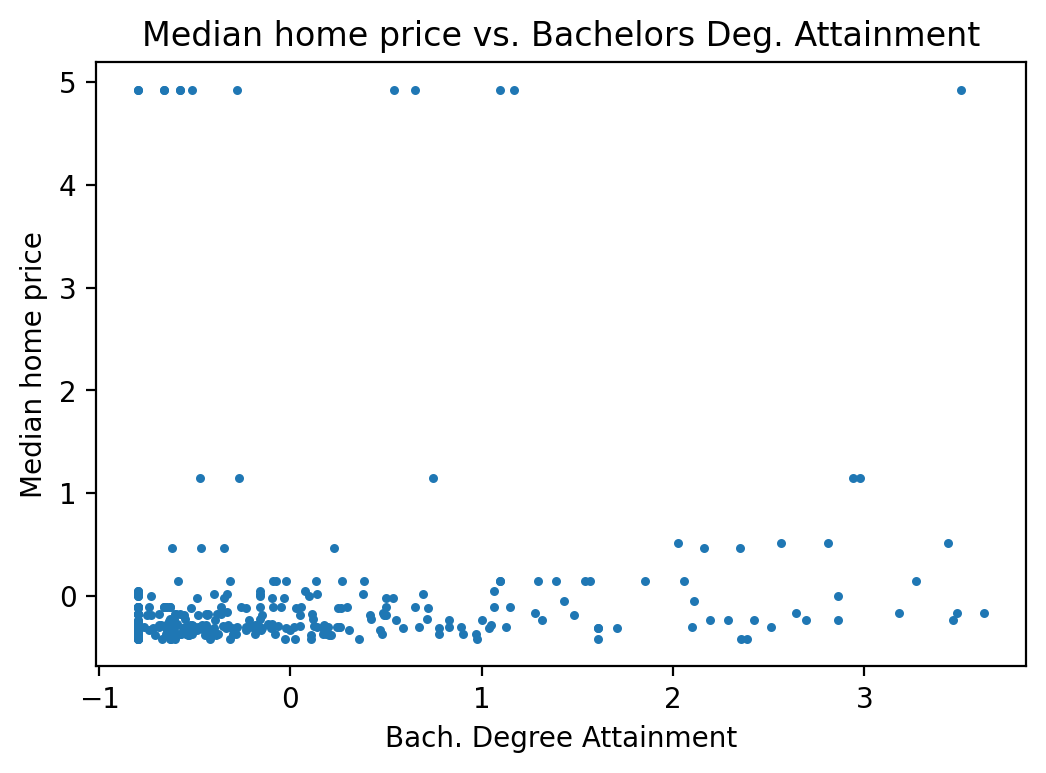

In [47]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

plt.scatter(x=transformed['bach_attainment'], y=transformed['sale_price'],
            s=5)
plt.title('Median home price vs. Bachelors Deg. Attainment')
plt.xlabel('Bach. Degree Attainment')
plt.ylabel('Median home price')
plt.show()

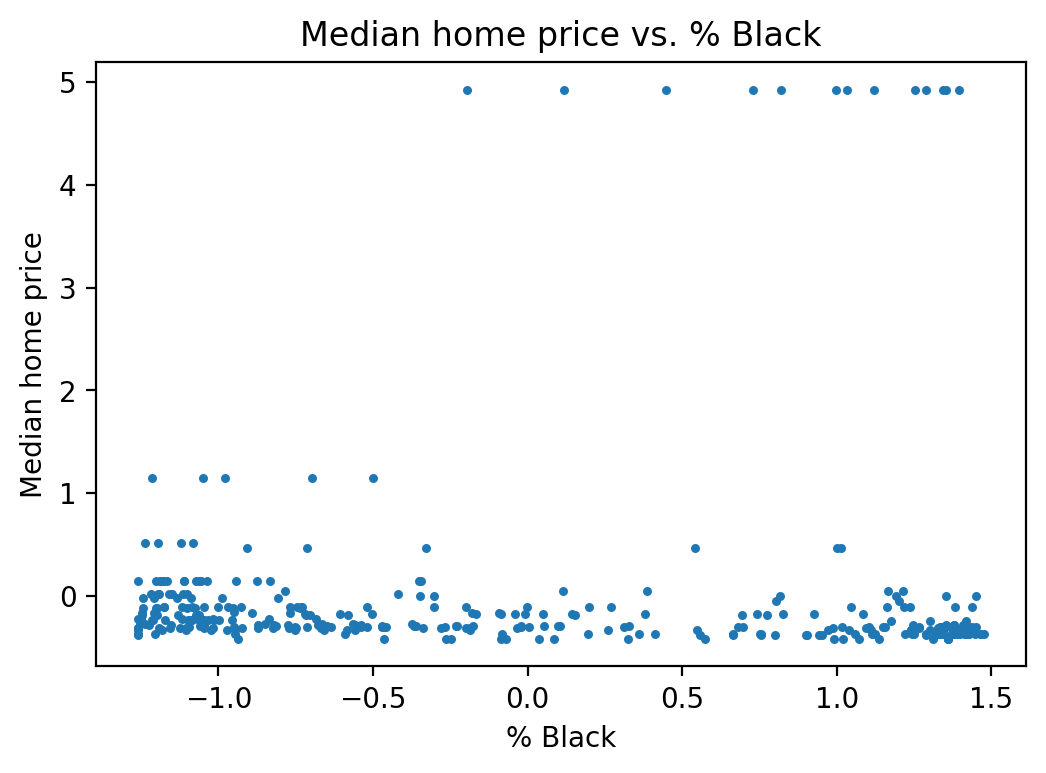

In [48]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

plt.scatter(x=transformed['black_pct'], y=transformed['sale_price'], s=5)
plt.title('Median home price vs. % Black')
plt.xlabel('% Black')
plt.ylabel('Median home price')
plt.show()


In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

plt.scatter(x=philly_df['property_crime'], y=philly_df['sale_price'], s=5)
plt.title('Median home price vs. % Black')
plt.xlabel('% Black')
plt.ylabel('Median home price')
plt.show()

(array([54., 86., 75., 59., 29., 25., 10.,  4.,  4.,  2.]),
 array([ 13354. ,  25040.8,  36727.6,  48414.4,  60101.2,  71788. ,
         83474.8,  95161.6, 106848.4, 118535.2, 130222. ]),
 <BarContainer object of 10 artists>)

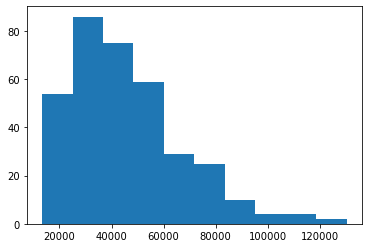

In [60]:
#skewed
plt.hist(selected_columns.median_income)

(array([181.,  59.,  38.,  18.,  16.,   9.,   7.,   8.,   5.,   7.]),
 array([ 0. ,  8.1, 16.2, 24.3, 32.4, 40.5, 48.6, 56.7, 64.8, 72.9, 81. ]),
 <BarContainer object of 10 artists>)

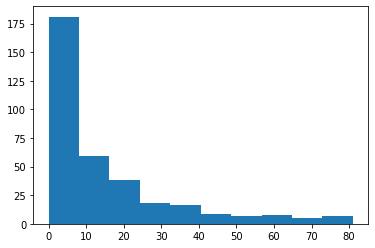

In [61]:
#skewed
plt.hist(selected_columns.bach_attainment)

(array([13., 29., 62., 70., 70., 43., 26., 23.,  6.,  6.]),
 array([ 384. , 1247.8, 2111.6, 2975.4, 3839.2, 4703. , 5566.8, 6430.6,
        7294.4, 8158.2, 9022. ]),
 <BarContainer object of 10 artists>)

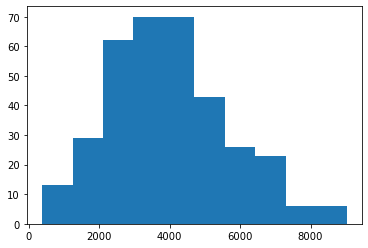

In [62]:
#not skewed
plt.hist(selected_columns.total_pop)

(array([100.,  37.,  29.,  24.,  16.,  19.,  22.,  30.,  42.,  29.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

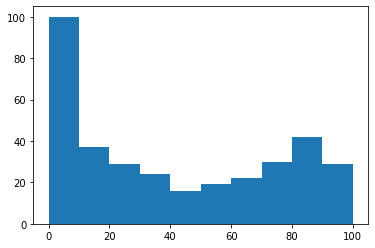

In [63]:
#is this skewed?
plt.hist(selected_columns.White_pct)

(array([89., 41., 28., 25., 18., 13.,  7., 19., 30., 78.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

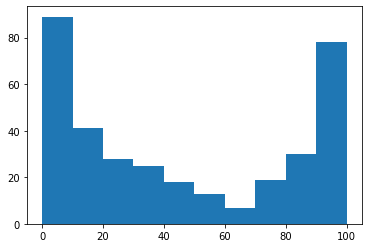

In [64]:
#is this skewed?
plt.hist(selected_columns.Black_pct)       

(array([259.,  51.,  24.,   9.,   2.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  7.91558103, 15.83116206, 23.7467431 , 31.66232413,
        39.57790516, 47.49348619, 55.40906722, 63.32464825, 71.24022929,
        79.15581032]),
 <BarContainer object of 10 artists>)

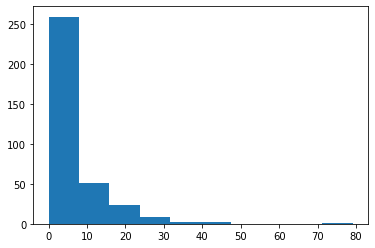

In [65]:
#right skewed
plt.hist(selected_columns.Asian_pct)

(array([161., 113.,  36.,  14.,   8.,  10.,   0.,   1.,   4.,   1.]),
 array([ 0.66481994, 10.39000462, 20.11518929, 29.84037396, 39.56555863,
        49.29074331, 59.01592798, 68.74111265, 78.46629732, 88.19148199,
        97.91666667]),
 <BarContainer object of 10 artists>)

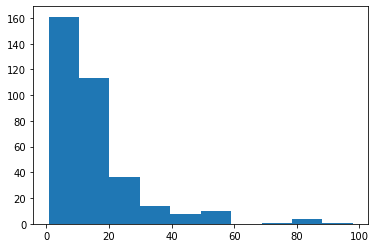

In [66]:
#right skewed
plt.hist(selected_columns.Other_pct)

(array([18., 67., 81., 60., 52., 39., 17.,  9.,  3.,  2.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 ]),
 <BarContainer object of 10 artists>)

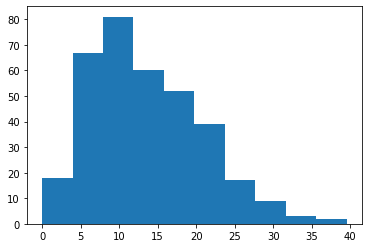

In [67]:
#not skewed
plt.hist(selected_columns.unemploy_pct)

(array([ 52., 124.,  75.,  26.,  41.,  13.,   9.,   3.,   2.,   3.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

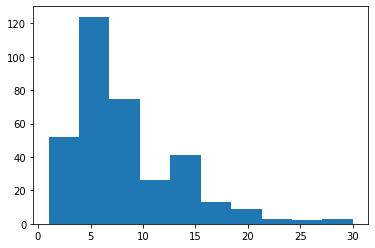

In [68]:
#right skewed
plt.hist(selected_columns.total_businesses)
       

(array([288.,  48.,   5.,   1.,   2.,   1.,   0.,   1.,   1.,   1.]),
 array([3.50000e-01, 6.11870e+01, 1.22024e+02, 1.82861e+02, 2.43698e+02,
        3.04535e+02, 3.65372e+02, 4.26209e+02, 4.87046e+02, 5.47883e+02,
        6.08720e+02]),
 <BarContainer object of 10 artists>)

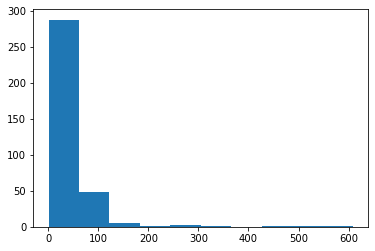

In [69]:
#turn this into a rate (per 100K people), right skewed
plt.hist(selected_columns.nuisance_crime)

(array([166., 107.,  43.,  12.,   7.,   6.,   4.,   2.,   0.,   1.]),
 array([  4.47,  69.14, 133.81, 198.48, 263.15, 327.82, 392.49, 457.16,
        521.83, 586.5 , 651.17]),
 <BarContainer object of 10 artists>)

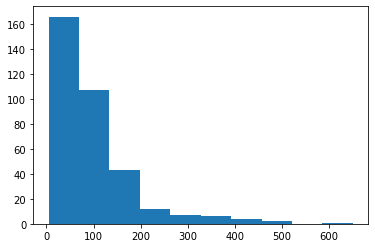

In [70]:
#turn this into a rate (per 100K people), right skewed
plt.hist(selected_columns.other_crime)

(array([161., 143.,  33.,   9.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  16.53 ,  118.344,  220.158,  321.972,  423.786,  525.6  ,
         627.414,  729.228,  831.042,  932.856, 1034.67 ]),
 <BarContainer object of 10 artists>)

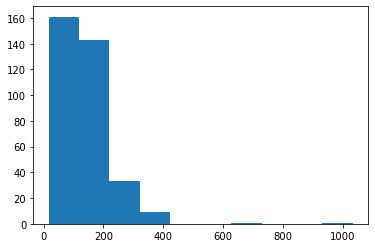

In [71]:
#right skewed
plt.hist(selected_columns.property_crime)

(array([50., 78., 56., 56., 42., 28., 20., 10.,  4.,  4.]),
 array([  7.   ,  43.647,  80.294, 116.941, 153.588, 190.235, 226.882,
        263.529, 300.176, 336.823, 373.47 ]),
 <BarContainer object of 10 artists>)

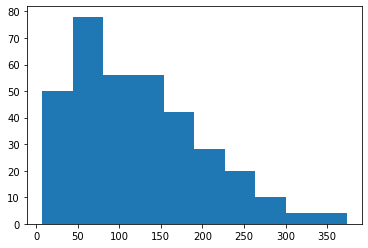

In [72]:
#right skewed
plt.hist(selected_columns.violent_crime)

(array([303.,  27.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([  12600.,  143190.,  273780.,  404370.,  534960.,  665550.,
         796140.,  926730., 1057320., 1187910., 1318500.]),
 <BarContainer object of 10 artists>)

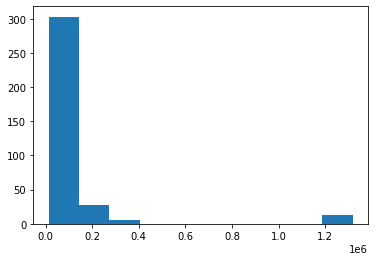

In [73]:
#get rid of outliers
plt.hist(selected_columns.sale_price)

### Random Forest Regression

In [83]:
#variable transform function
def transform_cols(df):
    transformed_df = pd.DataFrame()

    transformed_df['median_income'] = np.log1p(df['median_income'])
    transformed_df['bach_attainment'] = df['bach_attainment']
    transformed_df['White_pct'] = np.log1p(df['White_pct'])
    transformed_df['Black_pct'] = np.log1p(df['Black_pct'])
    transformed_df['Asian_pct'] = np.log1p(df['Asian_pct'])
    transformed_df['Other_pct'] = np.log1p(df['Other_pct'])
    transformed_df['total_businesses'] = np.log1p(df['total_businesses'])
    transformed_df['unemploy_pct'] = np.log1p(df['unemploy_pct'])
    transformed_df['sale_price'] = df['sale_price']

    #crime per 1k people
    transformed_df['nuis_per_1k'] = np.log1p(df['nuisance_crime']/df['total_pop']*1000)
    transformed_df['viol_per_1k'] = np.log1p(df['violent_crime']/df['total_pop']*1000)
    transformed_df['prop_per_1k'] = np.log1p(df['property_crime']/df['total_pop']*1000)
    transformed_df['other_per_1k'] = np.log1p(df['other_crime']/df['total_pop']*1000)
    transformed_df['total_per_1k'] = np.log1p(df['total_offenses']/df['total_pop']*1000)

    #city
    if 'city' in df.columns:
        transformed_df['city'] = df['city']

    transformed_df = transformed_df[transformed_df['sale_price'] < 1000000]
    return transformed_df

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#rf analysis function
def rfr_analysis(df, features, target):
    # --- Define features and target --
    X = df[features]
    y = df[target]

    # --- Train/test split ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Model setup ---
    rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

    # --- Train model ---
    rf.fit(X_train, y_train)

    # --- Predictions ---
    y_pred = rf.predict(X_test)

    # --- Evaluation ---
    mae = mean_absolute_error(y_test, y_pred)
    # rmse = root_mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    # print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

    return rf

In [33]:
#feature importance function
def feature_importance(model, features):
    # --- Feature importance ---
    importances = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_df.sort_values(by='Importance', ascending=False, inplace=True)

    # --- Plot feature importances ---
    plt.figure(figsize=(8, 5), dpi=200)
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title('Random Forest Feature Importances')
    plt.tight_layout()
    plt.show()

### Philly model

In [45]:
#transform skewed vars
transformed_phl = transform_cols(selected_columns_phl)

features=['median_income', 'bach_attainment', 'White_pct',
        'Black_pct', 'Asian_pct', 'Other_pct']

target = 'sale_price'

#run rfr analysis
phl_model = rfr_analysis(transformed_phl, features, target)

MAE: 24490.93
R²: 0.51


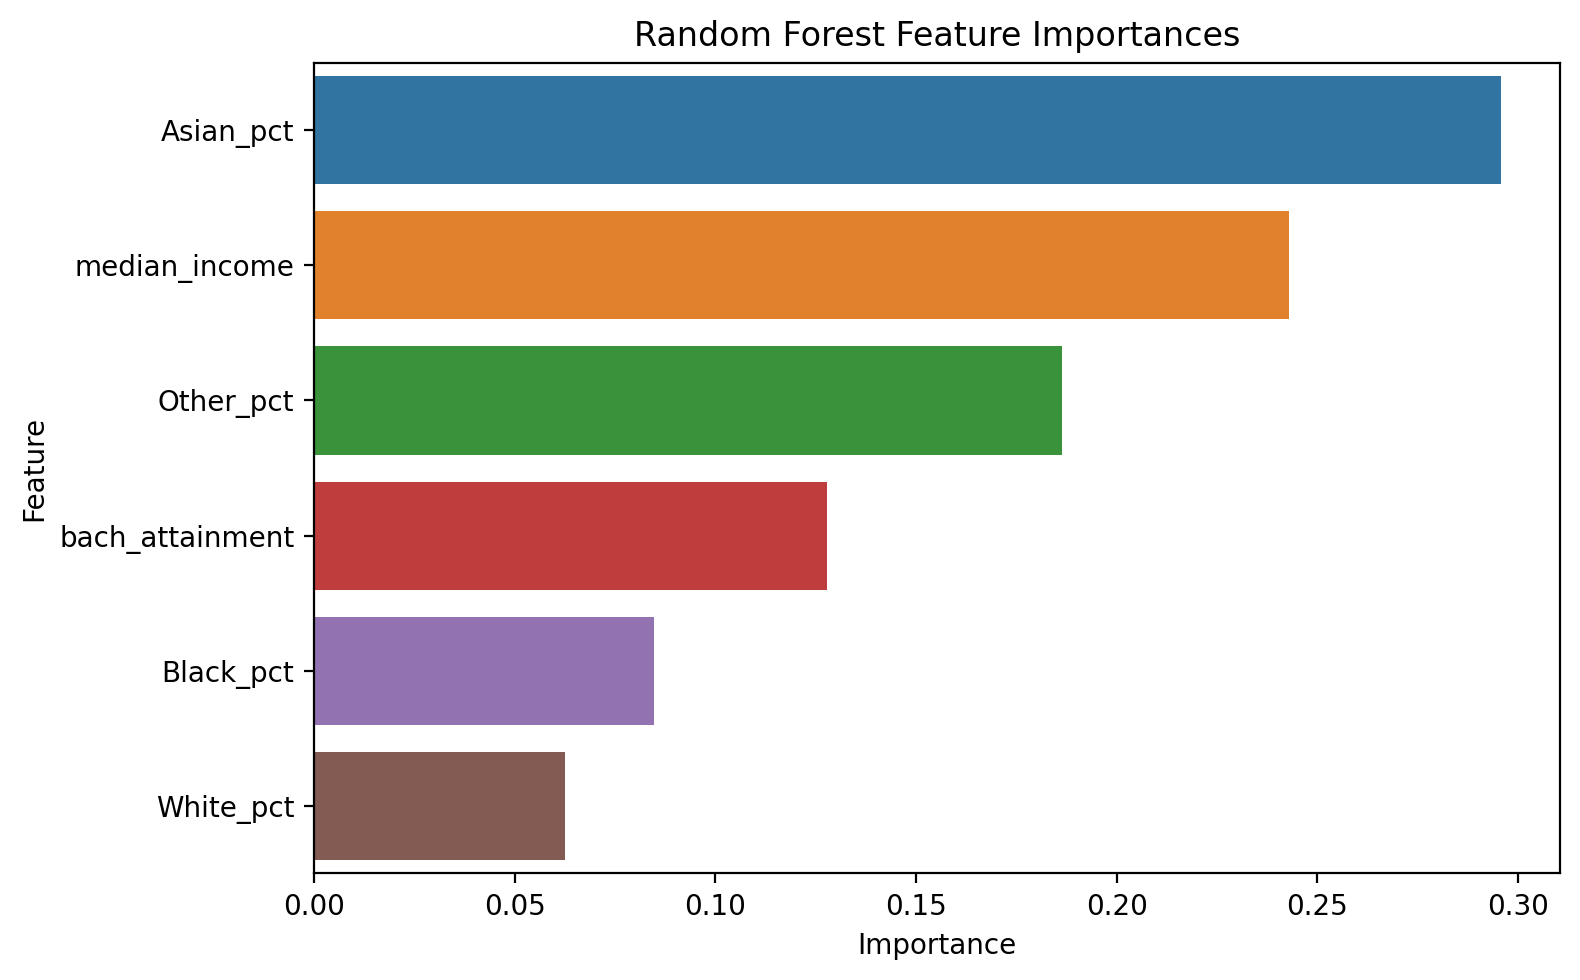

In [47]:
#plot feature importance
feature_importance(phl_model, features)

### Pittsburgh model

In [60]:
#transform skewed vars
transformed_pitt = transform_cols(selected_columns_pitt)

#run rfr analysis
features=['median_income', 'bach_attainment', 'White_pct',
        'Black_pct', 'Asian_pct', 'Other_pct', 'unemploy_pct',
        'total_businesses', 'nuis_per_1k', 'viol_per_1k', 'prop_per_1k',
        'other_per_1k', 'total_per_1k', ]

target = 'sale_price'

pitt_model = rfr_analysis(transformed_pitt, features, target)

MAE: 22681.50
R²: 0.38


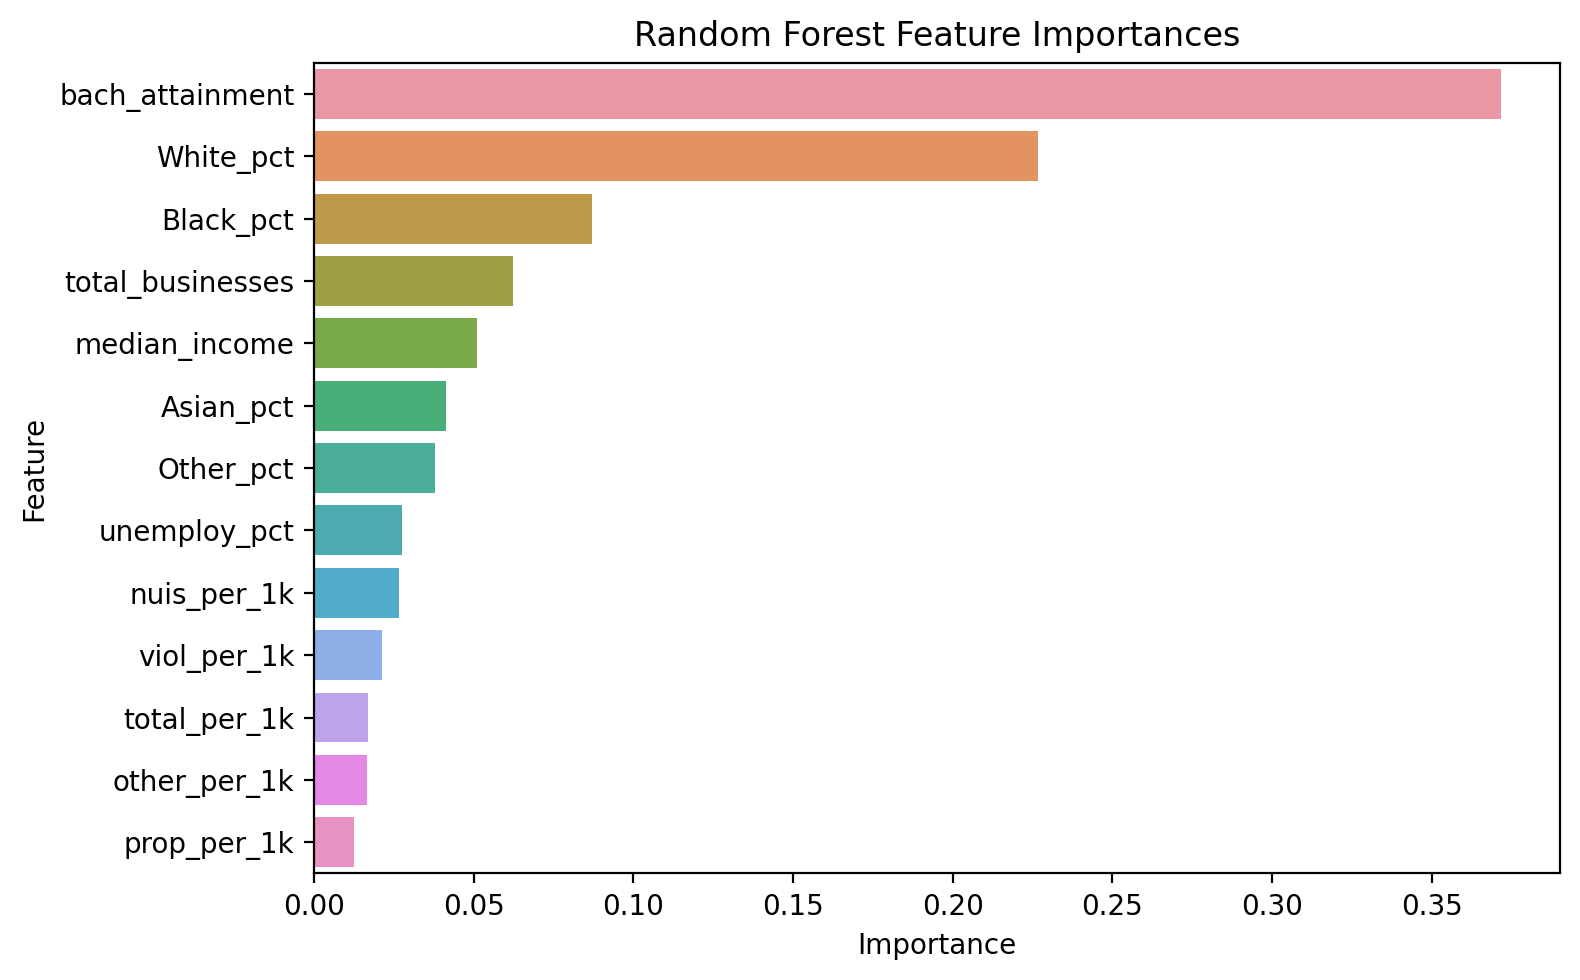

In [62]:
#plot feature importance
feature_importance(pitt_model, features)

### Detroit model

In [74]:
#transform skewed vars
transformed_det = transform_cols(selected_columns_det)

features=['median_income', 'unemploy_pct',
        'total_businesses', 'nuis_per_1k', 'viol_per_1k', 'prop_per_1k',
        'other_per_1k', 'total_per_1k']

target = 'sale_price'

#run rfr analysis
det_model = rfr_analysis(transformed_det, features, target)

MAE: 19634.48
R²: 0.46


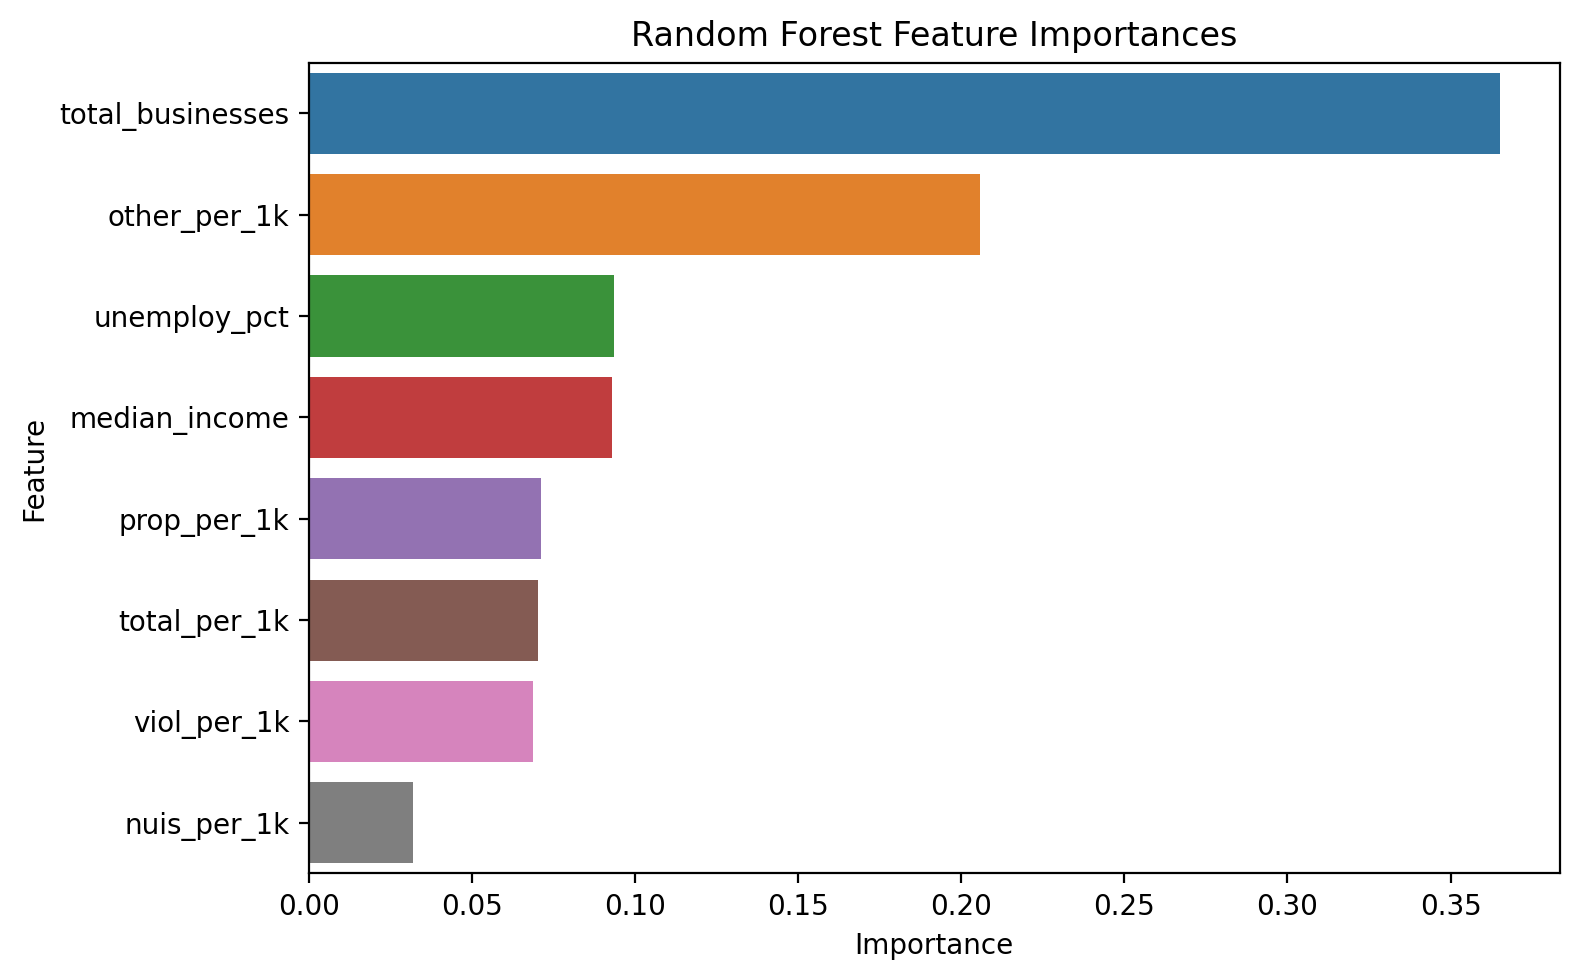

In [75]:
#plot feature importance
feature_importance(det_model, features)

### Combined model

In [79]:
#add a city column
selected_columns_det['city'] = 1
selected_columns_phl['city'] = 2
selected_columns_pitt['city'] = 3

selected_columns_all = pd.concat([selected_columns_det, selected_columns_phl, selected_columns_pitt])

selected_columns_all.head()

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/303056870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_det['city'] = 1
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/303056870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_phl['city'] = 2
/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_17676/303056870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,median_income,bach_attainment,total_pop,White_pct,Black_pct,Asian_pct,Other_pct,unemploy_pct,total_businesses,nuisance_crime,other_crime,property_crime,violent_crime,total_offenses,city,address,zipcode,sale_price
0,36880.0,1.8,3557.0,5.847624,93.533877,0.000000,1.265111,25.6,8,0.06,0.59,3.12,2.19,5.96,1,16403 CARLISLE,48205,0.0
3279,43146.0,39.9,3045.0,8.801314,83.809524,3.973727,6.896552,18.0,2,0.23,1.11,4.34,3.07,8.76,1,15294 EDMORE DR,48205,0.0
5654,30881.0,3.5,3225.0,7.255814,90.945736,0.000000,3.503876,32.0,2,0.23,0.89,3.63,3.17,7.91,1,14472 LAPPIN,48205,100.0
7803,25733.0,0.0,1628.0,4.361179,95.638821,0.000000,0.245700,34.8,2,0.26,0.64,1.74,2.11,4.74,1,13851 SEYMOUR,48205,0.0
8824,37054.0,0.0,2579.0,2.675456,91.314463,0.000000,7.483521,36.7,8,0.24,1.08,2.29,2.07,5.68,1,15301 HAZELRIDGE,48205,0.0


In [78]:
selected_columns_all.columns

Index(['median_income', 'bach_attainment', 'total_pop', 'White_pct',
       'Black_pct', 'Asian_pct', 'Other_pct', 'unemploy_pct',
       'total_businesses', 'nuisance_crime', 'other_crime', 'property_crime',
       'violent_crime', 'total_offenses', 'city', 'address', 'zipcode',
       'sale_price'],
      dtype='object')

In [105]:
#transform skewed vars
transformed_all = transform_cols(selected_columns_all)
transformed_all = transformed_all[transformed_all['bach_attainment'] != '-']

#'median_income', 'bach_attainment', 'White_pct', 'Black_pct',
 #      'Asian_pct', 'Other_pct', 'total_businesses', 'unemploy_pct',
  #     'nuis_per_1k', 'viol_per_1k', 'prop_per_1k',
   #    'other_per_1k', 'total_per_1k', 'city'


features=['median_income', 'bach_attainment', 'White_pct', 'Black_pct', 'Asian_pct',
          'Other_pct', 'total_businesses', 'nuis_per_1k', 'prop_per_1k',
          'other_per_1k', 'total_per_1k']

target = 'sale_price'

#run rfr analysis
all_model = rfr_analysis(transformed_all, features, target)

MAE: 33320.99
R²: 0.33


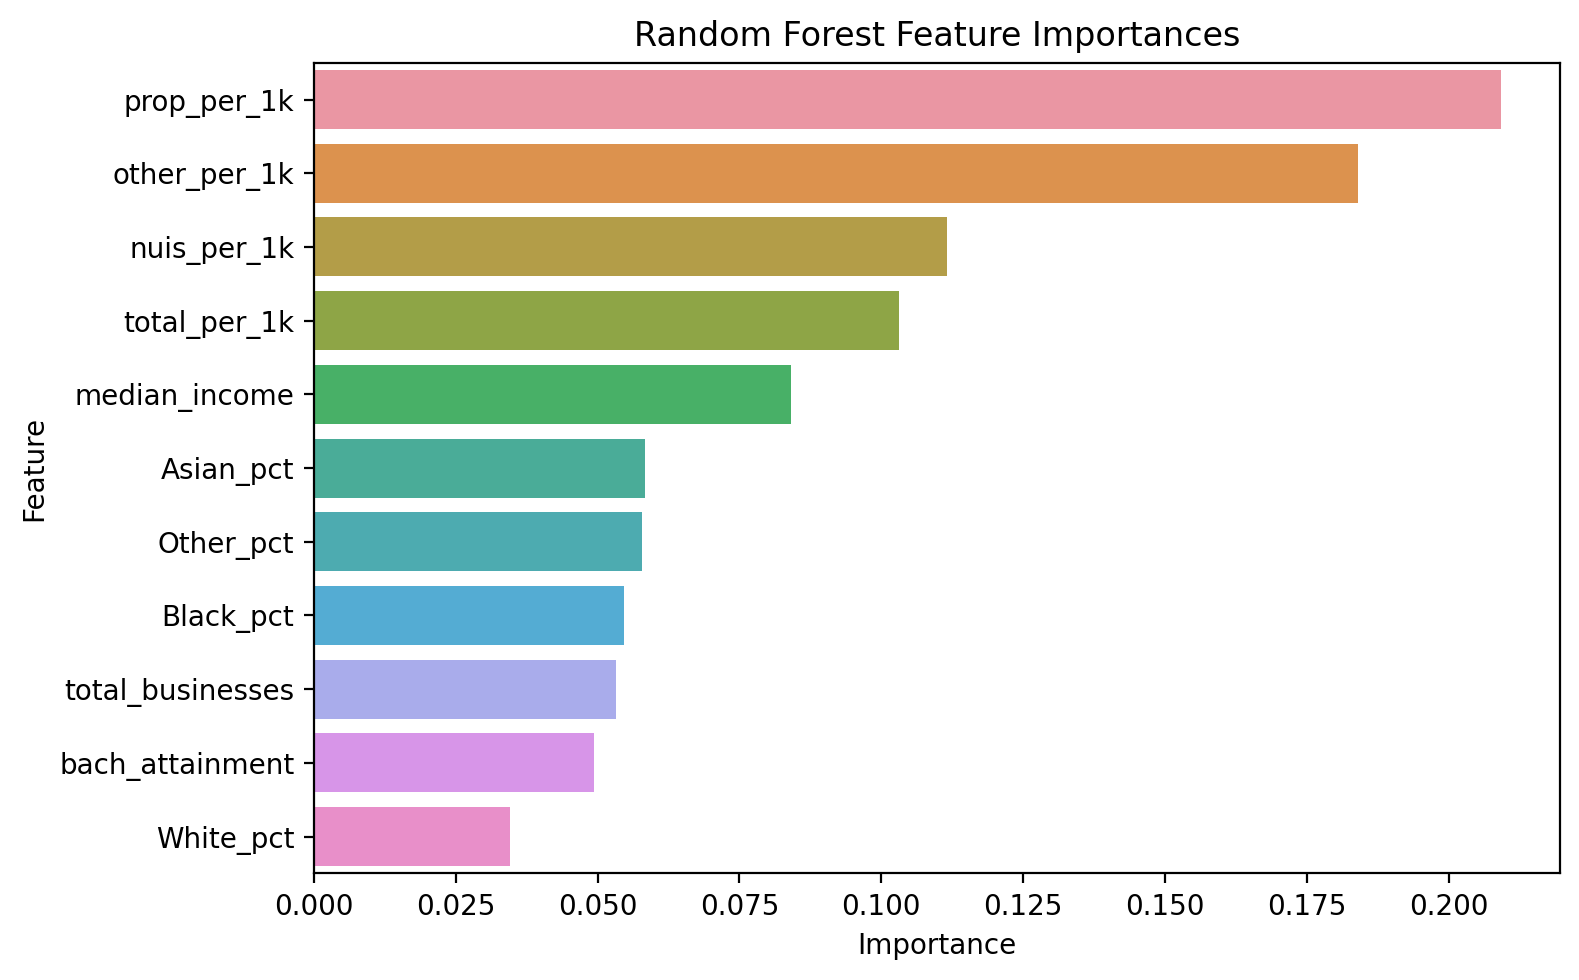

In [106]:
#plot feature importance
feature_importance(all_model, features)